# DATA WRANGLING

By<br>
<a href="https://github.com/Obed-Makori">Makori Obed</a>


### ABOUT THE PROJECT.
<p>This is a project submitted to Udacity Learning courtesy of ALX Data Analysis Scholarship. The goal of this project is to gather, assess and store data. The three fore-stated objectives fall under data wrangling process. This project is therefore targeting data wrangling understanding.</p>

The data is gathered through web scraping method.<br>
The data is assessed both visually and programmatically.<br>
The data is stored for future modelling, and reference( for business decision making)<br>

In [1]:
#importing common data analysis libraries
import pandas as pd
import numpy as np
import requests
import tweepy 
import json 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#accesssing the first dataset from udacity 
url1="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
twitter_archived_enhanced=pd.read_csv(url1)
#test
twitter_archived_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# extracting information about the dataset

twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The dataset has 17 features/columns<br>
Most of the features are of object type

In [4]:
#assing the second dataset
url2 = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url2)

#Checking the status code, 200 means successfully connected.
response.status_code



200

In [5]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
934,703382836347330562,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True
1253,748307329658011649,https://pbs.twimg.com/media/CmKFi-FXEAAeI37.jpg,2,paddle,0.589066,False,shovel,0.038062,False,mountain_tent,0.029203,False


In [6]:
# extracting information about the dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Scraping data from Twitter API 

In this section, we are going to scrape extra data that we will need in this data gathhering process, and the entire data analysis process.
To gather this data, we use Tweepy python library bto scrape data while targetting our feTURES OF INTEREST. For this case, we are going to querry each twet's retweetcount and favourite ("like") count. Finally, we shall store this data in a file named tweeet_json.txt 

In [7]:
# importing Tweepy library
import tweepy
import webbrowser 
import time
consumer_key = '2cJRi8AkyDT2Qd6nZDEsoe07L'
consumer_secret = '0NLbLJ1rpQ7zpZ7ZNoxm5asCHXqPYxoTfEqsMjgcsN2gBEwTtr'
access_token = '1067074859325423616-5qR8HAFNpcuN7jYySOWrnjsGrx5lLn'
access_secret = '6j0qgd4tHkDWE8ibOPBaMvEzKsA6uyDMaSrY0L3b9XWAJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archived_enhanced['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [9]:
# about the process
print("The the process gathered" ,len(list_of_tweets), " tweets")
#not found tweets
print(len(cant_find_tweets_for_those_ids), " Tweets were not found.")


The the process gathered 1770  tweets
586  Tweets were not found.


In [10]:
tweet_ids = list(twitter_archived_enhanced.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        pass;

In [11]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [12]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(2)

,tweet_id,retweets,favorites
1640,682429480204398592,1038,3163
2086,670427002554466305,141,460


# DATA ASSESSMENT

In this section, we assess the three gathered datasets for both tidiness and quality issues.
The assessment is done in two sub-sections
1. Visual Assessment

2. Programmatic assessment

The assessment is also done for the three datasets;<br>
tweets_df<br>
twitter_archived_enhanced<br>
image_prediction



## Visual Assessment
### twitter_archived_enhanced

In [13]:
twitter_archived_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Image Predictions Data

In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Twitter_Df

In [15]:
tweets_df

,tweet_id,retweets,favorites
0,892420643555336193,6953,33613
1,892177421306343426,5255,29151
2,891815181378084864,3462,21936
3,891689557279858688,7163,36672
4,891327558926688256,7702,35063
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,245
2323,666033412701032449,36,100
2324,666029285002620928,39,112


## Programmatic Assessment

### twitter_archived_enhanced

In [16]:
twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
#statistical summary
twitter_archived_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archived_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
twitter_archived_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
twitter_archived_enhanced.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

## ISSUES

### Quality issues

1. dog categories are of type string
2. timestamp is declared as a string data type
3. Dog names that don't begin with a capital letter are incorrect because most dog names do.
4. The predictions df's column names are not meaningful enough to be understood properly.
5. There is duplicate dog image links, which indicates that they direct us to the same image dog.
6. redundancy of retweets
7. tweet_id is of type int
8. n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
features have less feature importance necessary for the predictions, and they also have a lot of missing data.

### Tidiness Issues
<ol>
<li>dog stages in multiple columns (twitter_enhanced_archive)</li>
<li>Tables are separated</li>
</ol>





##   Data Cleaning

In [21]:
archive_clean =twitter_archived_enhanced.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = image_prediction.copy()


In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [24]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

In [25]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean = archive_clean.drop('variable', axis=1)

In [26]:
# Keep one of 3 duplicates with 'None'
dup_df1 = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_df1 = archive_clean.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean.duplicated(subset='tweet_id', keep = False)
dup_df2 = archive_clean[dup_pos]
dup_df2 = dup_df2[dup_df2.dog_stage != 'None']

# Combine
dup_df1 = dup_df1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_df2)

In [27]:

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8224 entries, 0 to 8223
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8224 non-null   object 
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8224 non-null   object 
 4   source                      8224 non-null   object 
 5   text                        8224 non-null   object 
 6   retweeted_status_id         280 non-null    float64
 7   retweeted_status_user_id    280 non-null    float64
 8   retweeted_status_timestamp  280 non-null    object 
 9   expanded_urls               8224 non-null   object 
 10  rating_numerator            8224 non-null   int64  
 11  rating_denominator          8224 non-null   int64  
 12  name                        8224 non-null   object 
 13  retweets                    8224 

## DEALING WITH THE FORE-MENTIONED ISSUES

## Quality Issues

**Quality isuue 1**

**Issue Definition:** dog categories are str (twitter_archived_enhanced)

**Code:** convert dog_stage to categorical type

In [28]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

Testing

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8224 entries, 0 to 8223
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    8224 non-null   object  
 1   in_reply_to_status_id       92 non-null     float64 
 2   in_reply_to_user_id         92 non-null     float64 
 3   timestamp                   8224 non-null   object  
 4   source                      8224 non-null   object  
 5   text                        8224 non-null   object  
 6   retweeted_status_id         280 non-null    float64 
 7   retweeted_status_user_id    280 non-null    float64 
 8   retweeted_status_timestamp  280 non-null    object  
 9   expanded_urls               8224 non-null   object  
 10  rating_numerator            8224 non-null   int64   
 11  rating_denominator          8224 non-null   int64   
 12  name                        8224 non-null   object  
 13  retweets          

**Quality Issue 2**

**Issue Definition:** timestamp is str

**code:** Change the timestamp to datetime type data type

In [30]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

<b>Testing</b>

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8224 entries, 0 to 8223
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    8224 non-null   object             
 1   in_reply_to_status_id       92 non-null     float64            
 2   in_reply_to_user_id         92 non-null     float64            
 3   timestamp                   8224 non-null   datetime64[ns, UTC]
 4   source                      8224 non-null   object             
 5   text                        8224 non-null   object             
 6   retweeted_status_id         280 non-null    float64            
 7   retweeted_status_user_id    280 non-null    float64            
 8   retweeted_status_timestamp  280 non-null    object             
 9   expanded_urls               8224 non-null   object             
 10  rating_numerator            8224 non-null   int64           

In [32]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


<b>Quality issue 3</b>

<b>Issue Definition:</b>The predictions df's column names are not meaningful enough to be understood properly.

<b>Code:</b> Rename the meaningful column titles in the predictions dataframe.

In [33]:
img_pred_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

Testing

In [34]:
#viewing the columns
for column in img_pred_clean.columns:
  
  print(column)

tweet_id
jpg_url
img_num
first_prediction
first_confidence
first_dog
second_prediction
second_confidence
second_dog
third_prediction
third_confidence
third_dog


In [35]:
#viwing the dataset
img_pred_clean.head(10)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Quality issue 4:
Dog names that don't begin with a capital letter are incorrect because most dog names do.


In [36]:
archive_clean['name'].str.islower().sum()

400

In [37]:
#executing
archive_clean['name'] = archive_clean.name.str.capitalize()

In [38]:
archive_clean['name'].str.islower().sum()

0

In [39]:
#similarlyy in the image prediction dataset

img_pred_clean['first_prediction'] =img_pred_clean.first_prediction.str.capitalize()

img_pred_clean['second_prediction'] = img_pred_clean.second_prediction.str.capitalize()

img_pred_clean['third_prediction'] = img_pred_clean.third_prediction.str.capitalize()


In [40]:
img_pred_clean.first_prediction.sample(10)


1546                 Cocker_spaniel
316                      Toy_poodle
2063                 French_bulldog
631     Soft-coated_wheaten_terrier
515                           Teddy
600                  French_bulldog
241                English_springer
445           Flat-coated_retriever
1252                         Kelpie
847                             Pug
Name: first_prediction, dtype: object

In [41]:
img_pred_clean.first_prediction.value_counts().head()

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Name: first_prediction, dtype: int64

<b>Quality issue 5</b>

<strong>Issue Definition:</strong> There is duplicate dog image links, which indicates that they direct us to the same image dog.

<b>Code:</b> Drop duplicate values from jpg_url column in the predictions_df.

In [42]:
img_pred_clean =img_pred_clean.drop_duplicates(subset=['jpg_url'], keep='first')

Testing

In [43]:
sum(img_pred_clean['jpg_url'].duplicated())

0

<b>Quality issue 6</b>

<strong>Issue Definition:</strong> redundancy of retweets


<b>Code:</b> remove retweets

In [44]:
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]
archive_clean = archive_clean[pd.isnull(archive_clean.in_reply_to_status_id)]

Testing

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 0 to 8223
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7852 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   7852 non-null   datetime64[ns, UTC]
 4   source                      7852 non-null   object             
 5   text                        7852 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               7852 non-null   object             
 10  rating_numerator            7852 non-null   int64           

**Quality issue 7**

**Issue Definition:** tweet_id is of type int

Code: convert tweet id to datatype string

In [46]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
tweets_df.tweet_id = tweets_df.tweet_id.astype(str)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Testing

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 0 to 8223
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    7852 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   7852 non-null   datetime64[ns, UTC]
 4   source                      7852 non-null   object             
 5   text                        7852 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               7852 non-null   object             
 10  rating_numerator            7852 non-null   int64           

**Quality issue 8**

**Issue Definition:** n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
features have less feature importance necessary for the predictions, and they also have a lot of missing data.

**Code:** Drop the columns.

In [48]:
archive_clean =archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Testing

In [49]:
archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweets,favorites,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,6953,33613,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,5255,29151,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3462,21936,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [50]:
for column in archive_clean.columns:
  print(column)

tweet_id
timestamp
text
rating_numerator
rating_denominator
name
retweets
favorites
jpg_url
img_num
p1
p1_conf
p1_dog
p2
p2_conf
p2_dog
p3
p3_conf
p3_dog
dog_stage


## Cleaninig Tidiness Issues

<ol>

<li>dog stages is irrevant</li>
<li>Tables are separated</li>
</ol>


In [51]:
archive_clean_new = archive_clean.copy()
tweets_clean = tweets_df.copy()
img_pred_clean_new = img_pred_clean.copy()

In [52]:
#archive_clean_new = archive_clean_new[~((archive_clean_new['doggo'] != 'doggo') & (archive_clean_new['floofer'] != 'floofer') & (archive_clean_new['pupper'] != 'pupper') & (archive_clean_new['puppo'] != 'puppo'))].replace('None', np.nan)

In [53]:
archive_clean_new= pd.melt(archive_clean_new, id_vars = ['tweet_id','timestamp','text','rating_numerator','name'],
                      var_name = 'stages', value_name = 'classifier')

Testing

In [54]:
archive_clean_new.head(10)

,tweet_id,timestamp,text,rating_numerator,name,stages,classifier
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,rating_denominator,10
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,Tilly,rating_denominator,10
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,rating_denominator,10
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,Darla,rating_denominator,10
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,Franklin,rating_denominator,10
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,None,rating_denominator,10
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,rating_denominator,10
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13,None,rating_denominator,10
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13,Zoey,rating_denominator,10
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,Cassie,rating_denominator,10


In [55]:
archive_clean_new.sample(10)

,tweet_id,timestamp,text,rating_numerator,name,stages,classifier
43313,860524505164394496,2017-05-05 16:00:04+00:00,This is Carl. He likes to dance. Doesn't care ...,13,Carl,p1,Bedlington_terrier
104502,793120401413079041,2016-10-31 16:00:13+00:00,This is Robin. She's desperately trying to do ...,11,Robin,p3_dog,True
42543,682047327939461121,2015-12-30 03:55:29+00:00,We normally don't rate bears but this one seem...,10,None,p1,teddy
47596,788908386943430656,2016-10-20 01:03:11+00:00,"This is Lucy. She destroyed not one, but two r...",11,Lucy,p1_conf,0.881538
9180,681610798867845120,2015-12-28 23:00:52+00:00,*collapses* 12/10 https://t.co/C7M8mnzHIK,12,None,retweets,415
85330,715200624753819648,2016-03-30 15:34:51+00:00,This is Michelangelope. He's half coffee cup. ...,12,Michelangelope,p2_dog,True
86439,877316821321428993,2017-06-21 00:06:44+00:00,Meet Dante. At first he wasn't a fan of his ne...,13,Dante,p3,golden_retriever
22378,740699697422163968,2016-06-09 00:19:04+00:00,This is Chip. He only mowed half the yard. 8/1...,8,Chip,favorites,2641
3454,675334060156301312,2015-12-11 15:19:21+00:00,Good morning here's a grass pupper. 12/10 http...,12,None,rating_denominator,10
111236,682750546109968385,2016-01-01 02:29:49+00:00,Meet Taco. He's a speckled Garnier Fructis. Lo...,9,Taco,dog_stage,None


In [56]:
archive_clean_new['stages'].unique()

array(['rating_denominator', 'retweets', 'favorites', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',
       'p3', 'p3_conf', 'p3_dog', 'dog_stage'], dtype=object)

In [57]:
#cleaning
archive_clean_new = archive_clean_new[archive_clean_new.stages != 'rating_denominator']
#testing
archive_clean_new['stages'].unique()

array(['retweets', 'favorites', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage'], dtype=object)

In [58]:
#testing
archive_clean_new.sample(5)

,tweet_id,timestamp,text,rating_numerator,name,stages,classifier
66098,682059653698686977,2015-12-30 04:44:28+00:00,This is Tess. Her main passions are shelves an...,11,Tess,p2,Siamese_cat
53249,832032802820481025,2017-02-16 01:04:13+00:00,This is Miguel. He was the only remaining dogg...,12,Miguel,p1_conf,0.601712
106337,817423860136083457,2017-01-06 17:33:29+00:00,This is Ken. His cheeks are magic. 13/10 (IG: ...,13,Ken,p3_dog,True
61412,775085132600442880,2016-09-11 21:34:30+00:00,This is Tucker. He would like a hug. 13/10 som...,13,Tucker,p1_dog,True
62940,861288531465048066,2017-05-07 18:36:02+00:00,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,13,None,p2,oxygen_mask


In [59]:
# dropping missing classifications
archive_clean_new.dropna(subset=['classifier'], inplace = True)

#testing
archive_clean_new.sample(4)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,name,stages,classifier
24283,748692773788876800,2016-07-01 01:40:41+00:00,That is Quizno. This is his beach. He does not...,10,His,jpg_url,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg
100014,667782464991965184,2015-11-20 19:12:01+00:00,Super rare dog. Endangered (?). Thinks it's fu...,9,None,p3_conf,0.054247
35195,668544745690562560,2015-11-22 21:41:02+00:00,It is an honor to rate this pup. He is a Snork...,10,None,img_num,1
11056,686947101016735744,2016-01-12 16:25:26+00:00,This is Jackson. He was specifically told not ...,11,Jackson,retweets,2893


Tidiness Issue 2

ssue Definition: Tables are separated

Code: Merging archive_clean_new and img_pred_clean_new tables together

In [60]:
img_pred_clean_new.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [61]:
archive_clean_new.head()

,tweet_id,timestamp,text,rating_numerator,name,stages,classifier
7852,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,retweets,6953
7853,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,Tilly,retweets,5255
7854,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,retweets,3462
7855,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,Darla,retweets,7163
7856,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,Franklin,retweets,7702


In [62]:
type(archive_clean_new)

pandas.core.frame.DataFrame

In [63]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2326 non-null   object
 1   retweets   2326 non-null   int64 
 2   favorites  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [64]:
tweets_clean['tweet_id']=tweets_clean['tweet_id'].astype(str)

tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2326 non-null   object
 1   retweets   2326 non-null   int64 
 2   favorites  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [65]:
archive_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109928 entries, 7852 to 117779
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   tweet_id          109928 non-null  object             
 1   timestamp         109928 non-null  datetime64[ns, UTC]
 2   text              109928 non-null  object             
 3   rating_numerator  109928 non-null  int64              
 4   name              109928 non-null  object             
 5   stages            109928 non-null  object             
 6   classifier        109928 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 6.7+ MB


In [66]:
# merging datasets
archive_clean_new = pd.merge(archive_clean_new, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean_new = pd.merge(archive_clean_new, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

archive_clean_new.sample()

,tweet_id,timestamp,text,rating_numerator,name,stages,classifier,retweets,favorites,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
57834,704761120771465216,2016-03-01 20:11:59+00:00,This pupper killed this great white in an epic...,13,None,p3,basenji,2614,6106,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,Basenji,0.072096,True


### Data Storage

In [67]:
archive_clean_new.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [68]:
# from google.colab import files 
# files.download('twitter_archive_master.csv')

### Data Analysis

This analysis is targeting to answer the question, How do retweets and favorites interact with one another?

In [69]:
#reading the dataset into a pandas dataframe
df=pd.read_csv("twitter_archive_master.csv")

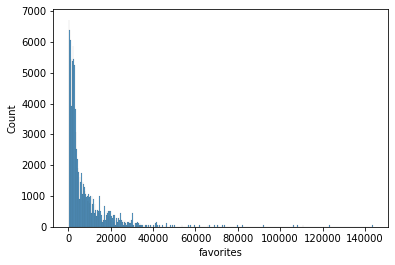

In [70]:
sns.histplot(df.favorites, label = 'Favorites')

plt.show()

It is clear that most favourite accounts among the tweets lie between o and 20000.

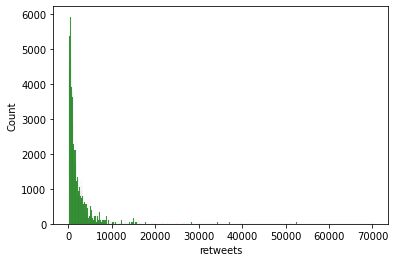

In [71]:
#analyzzing on retweeets obtained
sns.histplot(df.retweets, color="green",label = 'Retweets')

plt.show()

It is clear that most retweetslies between between o and 10000.

In [72]:
### Analyzing the correlation between favourite counts and retweets

corr = df.corr()
corr.style.background_gradient(cmap='ocean')


,tweet_id,rating_numerator,retweets,favorites,img_num,first_confidence,first_dog,second_confidence,second_dog,third_confidence,third_dog
tweet_id,1.000000,0.024922,0.385572,0.612638,0.215664,0.102470,0.119945,-0.000821,0.124802,-0.044799,0.096319
rating_numerator,0.024922,1.000000,0.019155,0.016807,-0.003165,-0.006999,-0.030792,-0.019751,-0.036241,-0.004223,-0.030879
retweets,0.385572,0.019155,1.000000,0.928516,0.105084,0.047299,0.000895,-0.014108,0.012674,-0.038377,0.005517
favorites,0.612638,0.016807,0.928516,1.000000,0.130846,0.069632,0.042144,-0.016254,0.052219,-0.046275,0.033828
img_num,0.215664,-0.003165,0.105084,0.130846,1.000000,0.202714,0.032714,-0.156567,0.056999,-0.137806,0.059547
first_confidence,0.102470,-0.006999,0.047299,0.069632,0.202714,1.000000,0.127061,-0.511022,0.142213,-0.707314,0.118888
first_dog,0.119945,-0.030792,0.000895,0.042144,0.032714,0.127061,1.000000,0.110839,0.640160,0.049916,0.560674
second_confidence,-0.000821,-0.019751,-0.014108,-0.016254,-0.156567,-0.511022,0.110839,1.000000,0.096856,0.481933,0.064919
second_dog,0.124802,-0.036241,0.012674,0.052219,0.056999,0.142213,0.640160,0.096856,1.000000,0.033872,0.559345
third_confidence,-0.044799,-0.004223,-0.038377,-0.046275,-0.137806,-0.707314,0.049916,0.481933,0.033872,1.000000,0.035461
